<a href="https://colab.research.google.com/github/YiningMa0822/Deep-Learning-Homework/blob/main/Homework4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning- Homework 4
### 马艺宁 2019141210086 2022/04/07

首先，我们导入原始数据。

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import torch
import torch.nn as nn
import scipy
from torch import optim as op

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [ ]:
y = y.astype('int64')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
x_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
x_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [ ]:
y_train.shape

torch.Size([56000])

In [ ]:
x_train = x_train.to('cuda:0')
y_train = y_train.to('cuda:0')
x_test = x_test.to('cuda:0')
y_test = y_test.to('cuda:0')

当神经网络隐藏层为一层时，我们运用每个优化器分别训练。

In [ ]:
# build the model
# layer = 1
class Net_1(nn.Module):
    def __init__(self):
        super(Net_1, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc3 = nn.Linear(500, 10)
        self.Relu = nn.ReLU()
        # self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        out = self.fc1(x)
        out = self.Relu(out)
        out = self.fc3(out)
        # out = self.softmax(out)

        return out

# initialize the NN
model = Net_1()
print(model)

model = model.to('cuda:0')

Net_1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
  (Relu): ReLU()
)


In [ ]:
## Specify loss and optimization functions
criterion = nn.CrossEntropyLoss()       #Cross Entropy Loss

SGD = op.SGD(model.parameters(), lr=1e-2)
SGD_M = op.SGD(model.parameters(),momentum=0.9, lr=1e-2)
RMSprop = op.RMSprop(model.parameters(), lr=1e-3)
Adam = op.Adam(model.parameters(), lr=1e-3)
optimizers = [SGD, SGD_M, RMSprop, Adam]

In [ ]:
n_epochs = 2000
train_list_1 = []
loss_list_1 = []
acc_list_1 = []


for optimizer in optimizers:
  
  for epoch in range(n_epochs):
      model.train()  # prep model for training

      optimizer.zero_grad()
      output = model(x_train)
      loss = criterion(output, y_train)
      
      loss.backward()
      optimizer.step()


      # prep model for *evaluation*
      if (epoch+1)%400 == 0:
        model.eval()

        train_out= model(x_train)
        loss_train = criterion(train_out, y_train)

        test_out = model(x_test)
        loss_test = criterion(test_out, y_test)
        acc_test = np.mean((torch.max(test_out,1)[1]==y_test).cpu().numpy())
        print('Epoch: {} \tTraining Loss: {:.6f} \tTest accuracy: {:.6f} \tAverage Test Loss: {:.6f}' .format(
            epoch + 1,
            loss_train, acc_test, loss_test
        ))

  train_list_1.append(loss_train)
  loss_list_1.append(loss_test)
  acc_list_1.append(acc_test)

Epoch: 400 	Training Loss: 0.192003 	Test accuracy: 0.927357 	Average Test Loss: 0.272919
Epoch: 800 	Training Loss: 0.131268 	Test accuracy: 0.943429 	Average Test Loss: 0.228764
Epoch: 1200 	Training Loss: 0.103920 	Test accuracy: 0.948643 	Average Test Loss: 0.219116
Epoch: 1600 	Training Loss: 0.086633 	Test accuracy: 0.952286 	Average Test Loss: 0.219195
Epoch: 2000 	Training Loss: 0.075556 	Test accuracy: 0.953571 	Average Test Loss: 0.221874
Epoch: 400 	Training Loss: 0.028971 	Test accuracy: 0.954714 	Average Test Loss: 0.278775
Epoch: 800 	Training Loss: 0.013698 	Test accuracy: 0.954714 	Average Test Loss: 0.350033
Epoch: 1200 	Training Loss: 0.006919 	Test accuracy: 0.953786 	Average Test Loss: 0.416094
Epoch: 1600 	Training Loss: 0.004145 	Test accuracy: 0.953071 	Average Test Loss: 0.467227
Epoch: 2000 	Training Loss: 0.002722 	Test accuracy: 0.953214 	Average Test Loss: 0.506895
Epoch: 400 	Training Loss: 0.263798 	Test accuracy: 0.940214 	Average Test Loss: 0.597780
Epoc

同理，当神经网络隐藏层为两层时：

In [ ]:
# build the model
# layer = 2
class Net_2(nn.Module):
    def __init__(self):
        super(Net_2, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 10)
        self.Relu = nn.ReLU()
        # self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        out = self.fc1(x)
        out = self.Relu(out) # 1
        out = self.fc2(out)
        out = self.Relu(out) # 2
        out = self.fc3(out)
        # out = self.softmax(out)

        return out

# initialize the NN
model = Net_2()
print(model)

model = model.to('cuda:0')

Net_2(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
  (Relu): ReLU()
)


In [ ]:
## Specify loss and optimization functions
criterion = nn.CrossEntropyLoss()       #Cross Entropy Loss

SGD = op.SGD(model.parameters(), lr=1e-2)
SGD_M = op.SGD(model.parameters(),momentum=0.9, lr=1e-2)
RMSprop = op.RMSprop(model.parameters(), lr=1e-3)
Adam = op.Adam(model.parameters(), lr=1e-3)
optimizers = [SGD, SGD_M, RMSprop, Adam]

In [ ]:
n_epochs = 2000
train_list_2 = []
loss_list_2 = []
acc_list_2 = []


for optimizer in optimizers:
  
  for epoch in range(n_epochs):
      model.train()  # prep model for training

      optimizer.zero_grad()
      output = model(x_train)
      loss = criterion(output, y_train)
      
      loss.backward()
      optimizer.step()


      # prep model for *evaluation*
      if (epoch+1)%400 == 0:
        model.eval()

        train_out= model(x_train)
        loss_train = criterion(train_out, y_train)

        test_out = model(x_test)
        loss_test = criterion(test_out, y_test)
        acc_test = np.mean((torch.max(test_out,1)[1]==y_test).cpu().numpy())
        print('Epoch: {} \tTraining Loss: {:.6f} \tTest accuracy: {:.6f} \tAverage Test Loss: {:.6f}' .format(
            epoch + 1,
            loss_train, acc_test, loss_test
        ))

  train_list_2.append(loss_train)
  loss_list_2.append(loss_test)
  acc_list_2.append(acc_test)

Epoch: 400 	Training Loss: 0.116445 	Test accuracy: 0.948714 	Average Test Loss: 0.176028
Epoch: 800 	Training Loss: 0.062970 	Test accuracy: 0.958714 	Average Test Loss: 0.147411
Epoch: 1200 	Training Loss: 0.039648 	Test accuracy: 0.962357 	Average Test Loss: 0.140674
Epoch: 1600 	Training Loss: 0.027134 	Test accuracy: 0.963071 	Average Test Loss: 0.139894
Epoch: 2000 	Training Loss: 0.019500 	Test accuracy: 0.964500 	Average Test Loss: 0.142073
Epoch: 400 	Training Loss: 0.002408 	Test accuracy: 0.966714 	Average Test Loss: 0.169776
Epoch: 800 	Training Loss: 0.000936 	Test accuracy: 0.967714 	Average Test Loss: 0.185645
Epoch: 1200 	Training Loss: 0.000544 	Test accuracy: 0.967786 	Average Test Loss: 0.195293
Epoch: 1600 	Training Loss: 0.000372 	Test accuracy: 0.967571 	Average Test Loss: 0.202040
Epoch: 2000 	Training Loss: 0.000278 	Test accuracy: 0.967714 	Average Test Loss: 0.207298
Epoch: 400 	Training Loss: 0.008789 	Test accuracy: 0.966357 	Average Test Loss: 0.232247
Epoc

当神经网络隐藏层为三层时：

In [ ]:
# build the model
# layers = 3
class Net_3(nn.Module):
    def __init__(self):
        super(Net_3, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 10)
        self.Relu = nn.ReLU()
        # self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        out = self.fc1(x)
        out = self.Relu(out) # 1
        out = self.fc2(out)
        out = self.Relu(out) # 2
        out = self.fc2(out)
        out = self.Relu(out) # 3
        out = self.fc3(out)
        # out = self.softmax(out)

        return out

# initialize the NN
model = Net_3()
print(model)

model = model.to('cuda:0')

Net_3(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
  (Relu): ReLU()
)


In [ ]:
## Specify loss and optimization functions
criterion = nn.CrossEntropyLoss()       #Cross Entropy Loss

SGD = op.SGD(model.parameters(), lr=1e-2)
SGD_M = op.SGD(model.parameters(),momentum=0.9, lr=1e-2)
RMSprop = op.RMSprop(model.parameters(), lr=1e-3)
Adam = op.Adam(model.parameters(), lr=1e-3)
optimizers = [SGD, SGD_M, RMSprop, Adam]

In [ ]:
n_epochs = 2000
train_list_3 = []
loss_list_3 = []
acc_list_3 = []


for optimizer in optimizers:
  
  for epoch in range(n_epochs):
      model.train()  # prep model for training

      optimizer.zero_grad()
      output = model(x_train)
      loss = criterion(output, y_train)
      
      loss.backward()
      optimizer.step()


      # prep model for *evaluation*
      if (epoch+1)%400 == 0:
        model.eval()

        train_out= model(x_train)
        loss_train = criterion(train_out, y_train)

        test_out = model(x_test)
        loss_test = criterion(test_out, y_test)
        acc_test = np.mean((torch.max(test_out,1)[1]==y_test).cpu().numpy())
        print('Epoch: {} \tTraining Loss: {:.6f} \tTest accuracy: {:.6f} \tAverage Test Loss: {:.6f}' .format(
            epoch + 1,
            loss_train, acc_test, loss_test
        ))

  train_list_3.append(loss_train)
  loss_list_3.append(loss_test)
  acc_list_3.append(acc_test)

Epoch: 400 	Training Loss: 0.047764 	Test accuracy: 0.970714 	Average Test Loss: 0.102287
Epoch: 800 	Training Loss: 0.034534 	Test accuracy: 0.972929 	Average Test Loss: 0.097385
Epoch: 1200 	Training Loss: 0.025675 	Test accuracy: 0.973500 	Average Test Loss: 0.095674
Epoch: 1600 	Training Loss: 0.019332 	Test accuracy: 0.973571 	Average Test Loss: 0.095480
Epoch: 2000 	Training Loss: 0.014659 	Test accuracy: 0.974143 	Average Test Loss: 0.096386
Epoch: 400 	Training Loss: 0.001816 	Test accuracy: 0.975143 	Average Test Loss: 0.117102
Epoch: 800 	Training Loss: 0.000707 	Test accuracy: 0.975286 	Average Test Loss: 0.128921
Epoch: 1200 	Training Loss: 0.000408 	Test accuracy: 0.975357 	Average Test Loss: 0.136252
Epoch: 1600 	Training Loss: 0.000276 	Test accuracy: 0.975500 	Average Test Loss: 0.141549
Epoch: 2000 	Training Loss: 0.000205 	Test accuracy: 0.975643 	Average Test Loss: 0.145593
Epoch: 400 	Training Loss: 0.000104 	Test accuracy: 0.975214 	Average Test Loss: 0.169598
Epoc

In [ ]:
acc_list_3

[0.9741428571428571, 0.9756428571428571, 0.9755, 0.9772857142857143]

当神经网络隐藏层为四层时：

In [ ]:
# build the model
# layers = 4
class Net_4(nn.Module):
    def __init__(self):
        super(Net_4, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 10)
        self.Relu = nn.ReLU()
        # self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        out = self.fc1(x)
        out = self.Relu(out) # 1
        out = self.fc2(out)
        out = self.Relu(out) # 2
        out = self.fc2(out)
        out = self.Relu(out) # 3
        out = self.fc2(out)
        out = self.Relu(out) # 4
        out = self.fc3(out)
        # out = self.softmax(out)

        return out

# initialize the NN
model = Net_4()
print(model)

model = model.to('cuda:0')

Net_4(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
  (Relu): ReLU()
)


In [ ]:
## Specify loss and optimization functions
criterion = nn.CrossEntropyLoss()       #Cross Entropy Loss

SGD = op.SGD(model.parameters(), lr=1e-2)
SGD_M = op.SGD(model.parameters(),momentum=0.9, lr=1e-2)
RMSprop = op.RMSprop(model.parameters(), lr=1e-3)
Adam = op.Adam(model.parameters(), lr=1e-3)
optimizers = [SGD, SGD_M, RMSprop, Adam]

In [ ]:
n_epochs = 2000
train_list_4 = []
loss_list_4 = []
acc_list_4 = []


for optimizer in optimizers:
  
  for epoch in range(n_epochs):
      model.train()  # prep model for training

      optimizer.zero_grad()
      output = model(x_train)
      loss = criterion(output, y_train)
      
      loss.backward()
      optimizer.step()


      # prep model for *evaluation*
      if (epoch+1)%400 == 0:
        model.eval()

        train_out= model(x_train)
        loss_train = criterion(train_out, y_train)

        test_out = model(x_test)
        loss_test = criterion(test_out, y_test)
        acc_test = np.mean((torch.max(test_out,1)[1]==y_test).cpu().numpy())
        print('Epoch: {} \tTraining Loss: {:.6f} \tTest accuracy: {:.6f} \tAverage Test Loss: {:.6f}' .format(
            epoch + 1,
            loss_train, acc_test, loss_test
        ))

  train_list_4.append(loss_train)
  loss_list_4.append(loss_test)
  acc_list_4.append(acc_test)

Epoch: 400 	Training Loss: 0.092201 	Test accuracy: 0.959143 	Average Test Loss: 0.138566
Epoch: 800 	Training Loss: 0.046086 	Test accuracy: 0.966500 	Average Test Loss: 0.111226
Epoch: 1200 	Training Loss: 0.025645 	Test accuracy: 0.969714 	Average Test Loss: 0.103368
Epoch: 1600 	Training Loss: 0.015097 	Test accuracy: 0.971500 	Average Test Loss: 0.101942
Epoch: 2000 	Training Loss: 0.009525 	Test accuracy: 0.972214 	Average Test Loss: 0.103056
Epoch: 400 	Training Loss: 0.001098 	Test accuracy: 0.973214 	Average Test Loss: 0.119720
Epoch: 800 	Training Loss: 0.000482 	Test accuracy: 0.973786 	Average Test Loss: 0.127974
Epoch: 1200 	Training Loss: 0.000292 	Test accuracy: 0.974000 	Average Test Loss: 0.133190
Epoch: 1600 	Training Loss: 0.000203 	Test accuracy: 0.973929 	Average Test Loss: 0.137037
Epoch: 2000 	Training Loss: 0.000154 	Test accuracy: 0.973857 	Average Test Loss: 0.140077
Epoch: 400 	Training Loss: 0.053034 	Test accuracy: 0.964714 	Average Test Loss: 0.115164
Epoc

In [ ]:
acc_list_4

[0.9722142857142857, 0.9738571428571429, 0.9755, 0.9764285714285714]

当神经网络层数为五层时：

In [ ]:
# build the model
# layers = 5
class Net_5(nn.Module):
    def __init__(self):
        super(Net_5, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 10)
        self.Relu = nn.ReLU()
        # self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        out = self.fc1(x)
        out = self.Relu(out) # 1
        out = self.fc2(out)
        out = self.Relu(out) # 2
        out = self.fc2(out)
        out = self.Relu(out) # 3
        out = self.fc2(out)
        out = self.Relu(out) # 4
        out = self.fc2(out)
        out = self.Relu(out) # 5
        out = self.fc3(out)
        # out = self.softmax(out)

        return out

# initialize the NN
model = Net_5()
print(model)

model = model.to('cuda:0')

Net_5(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
  (Relu): ReLU()
)


In [ ]:
## Specify loss and optimization functions
criterion = nn.CrossEntropyLoss()       #Cross Entropy Loss

SGD = op.SGD(model.parameters(), lr=1e-2)
SGD_M = op.SGD(model.parameters(),momentum=0.9, lr=1e-2)
RMSprop = op.RMSprop(model.parameters(), lr=1e-3)
Adam = op.Adam(model.parameters(), lr=1e-3)
optimizers = [SGD, SGD_M, RMSprop, Adam]

In [ ]:
n_epochs = 2000
train_list_5 = []
loss_list_5 = []
acc_list_5 = []


for optimizer in optimizers:
  
  for epoch in range(n_epochs):
      model.train()  # prep model for training

      optimizer.zero_grad()
      output = model(x_train)
      loss = criterion(output, y_train)
      
      loss.backward()
      optimizer.step()


      # prep model for *evaluation*
      if (epoch+1)%400 == 0:
        model.eval()

        train_out= model(x_train)
        loss_train = criterion(train_out, y_train)

        test_out = model(x_test)
        loss_test = criterion(test_out, y_test)
        acc_test = np.mean((torch.max(test_out,1)[1]==y_test).cpu().numpy())
        print('Epoch: {} \tTraining Loss: {:.6f} \tTest accuracy: {:.6f} \tAverage Test Loss: {:.6f}' .format(
            epoch + 1,
            loss_train, acc_test, loss_test
        ))

  train_list_5.append(loss_train)
  loss_list_5.append(loss_test)
  acc_list_5.append(acc_test)

Epoch: 400 	Training Loss: 0.119327 	Test accuracy: 0.955357 	Average Test Loss: 0.152815
Epoch: 800 	Training Loss: 0.063764 	Test accuracy: 0.966000 	Average Test Loss: 0.117504
Epoch: 1200 	Training Loss: 0.035897 	Test accuracy: 0.970643 	Average Test Loss: 0.102834
Epoch: 1600 	Training Loss: 0.020771 	Test accuracy: 0.972429 	Average Test Loss: 0.098337
Epoch: 2000 	Training Loss: 0.012647 	Test accuracy: 0.973000 	Average Test Loss: 0.098930
Epoch: 400 	Training Loss: 0.000958 	Test accuracy: 0.973357 	Average Test Loss: 0.123127
Epoch: 800 	Training Loss: 0.000384 	Test accuracy: 0.973643 	Average Test Loss: 0.134578
Epoch: 1200 	Training Loss: 0.000224 	Test accuracy: 0.973643 	Average Test Loss: 0.141571
Epoch: 1600 	Training Loss: 0.000153 	Test accuracy: 0.973929 	Average Test Loss: 0.146593
Epoch: 2000 	Training Loss: 0.000114 	Test accuracy: 0.973857 	Average Test Loss: 0.150527
Epoch: 400 	Training Loss: 0.152873 	Test accuracy: 0.935500 	Average Test Loss: 0.212402
Epoc

最后，我们对比以上神经网络的结果.

In [ ]:
# Loss in Train
Train = [train_list_1, train_list_2, train_list_3, train_list_4, train_list_5]

# Accutacy in Test
Acc = [acc_list_1, acc_list_2, acc_list_3, acc_list_4, acc_list_5]

# Loss in Test
Test = [loss_list_1, loss_list_2, loss_list_3, loss_list_4, loss_list_5]

In [ ]:
Test_1 = np.zeros((5,4))
for i in range(5):
  t0 = Test[i]
  for j in range(4):
    t1 = t0[j]
    a = t1.item()
    Test_1[i,j] = a
print(Test_1)

[[0.22187398 0.50689518 0.55468762 0.84911323]
 [0.14207302 0.20729831 0.37223014 0.41998759]
 [0.09638622 0.14559314 0.35128623 0.36071232]
 [0.10305554 0.14007662 0.26291749 0.40032157]
 [0.09892962 0.15052706 0.28512493 0.42616659]]


In [ ]:
Train_1 = np.zeros((5,4))
for i in range(5):
  t0 = Train[i]
  for j in range(4):
    t1 = t0[j]
    a = t1.item()
    Train_1[i,j] = a
print(Train_1)

[[7.55558833e-02 2.72233505e-03 2.66768574e-03 1.80278061e-04]
 [1.94997117e-02 2.78487249e-04 2.34079025e-07 2.19806878e-07]
 [1.46590164e-02 2.05052216e-04 5.07278042e-09 1.13057199e-08]
 [9.52514168e-03 1.53679852e-04 1.20799200e-06 5.65392355e-09]
 [1.26467245e-02 1.13606839e-04 3.68450401e-06 8.55538929e-09]]


In [ ]:
from sklearn.utils.validation import column_or_1d
x_tick = ['SGD', 'SGD_M', 'RMSprop', 'Adam']
y_tick = ['1 Layer', '2 Layers', '3 Layers', '4 Layers', '5 Layers']

print('loss in Test Set')
Loss_test = pd.DataFrame(Test_1, index=y_tick, columns=x_tick)
print(Loss_test)

loss in Test Set
               SGD     SGD_M   RMSprop      Adam
1 Layer   0.221874  0.506895  0.554688  0.849113
2 Layers  0.142073  0.207298  0.372230  0.419988
3 Layers  0.096386  0.145593  0.351286  0.360712
4 Layers  0.103056  0.140077  0.262917  0.400322
5 Layers  0.098930  0.150527  0.285125  0.426167


展示实验结果：

In [ ]:
print('loss in Train Set')
Loss_train = pd.DataFrame(Train_1, index=y_tick, columns=x_tick)
print(Loss_train)

loss in Train Set
               SGD     SGD_M       RMSprop          Adam
1 Layer   0.075556  0.002722  2.667686e-03  1.802781e-04
2 Layers  0.019500  0.000278  2.340790e-07  2.198069e-07
3 Layers  0.014659  0.000205  5.072780e-09  1.130572e-08
4 Layers  0.009525  0.000154  1.207992e-06  5.653924e-09
5 Layers  0.012647  0.000114  3.684504e-06  8.555389e-09


In [ ]:
print('accuracy in Test Set')
accuracy = pd.DataFrame(Acc, index=y_tick, columns=x_tick)
print(accuracy)

accuracy in Test Set
               SGD     SGD_M   RMSprop      Adam
1 Layer   0.953571  0.953214  0.961571  0.960500
2 Layers  0.964500  0.967714  0.971500  0.972786
3 Layers  0.974143  0.975643  0.975500  0.977286
4 Layers  0.972214  0.973857  0.975500  0.976429
5 Layers  0.973000  0.973857  0.976929  0.977857


Text(0.5, 1.0, 'Loss in Train Set of derrfernt models')

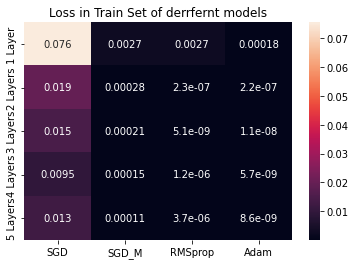

In [ ]:
import seaborn as sns

ax1 = sns.heatmap(Loss_train, annot=True)
plt.title('Loss in Train Set of derrfernt models')                

Text(0.5, 1.0, 'Loss in Test Set of derrfernt models')

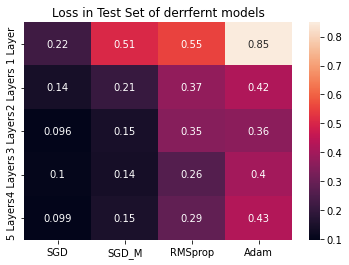

In [ ]:
ax1 = sns.heatmap(Loss_test, annot=True)
plt.title('Loss in Test Set of derrfernt models')  

Text(0.5, 1.0, 'Accuracy in Train Set of derrfernt models')

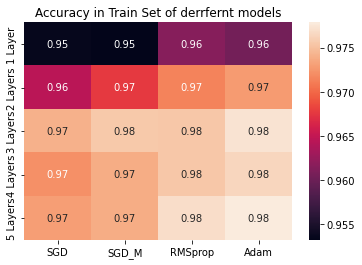

In [ ]:
ax3 = sns.heatmap(accuracy, annot=True)
plt.title('Accuracy in Train Set of derrfernt models')  

### 综上所述，针对本问题，我们可以看出隐藏层为**1层时模型效果最差**，**3层时效果较好**。在优化器方面，**SGD优化器效果最差，Adam效果最好**，优化效果：**Adam > RMSprop > SGD+momentum0.9 > SGD**.